This notebook compares the metal partial charge, obtained from Bader charge analysis, between DLPNO-CCSD, PBE0, PBEx, and a DF-BP PBEx model utilizing PBE0 densities as input and random seed 5 for the train/val split.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import json
from tqdm import tqdm

In [2]:
df = pd.read_csv('../data/csd76_charge_comparison.csv').set_index('Unnamed: 0')

names = set([x[:-3] for x in df.index])
combined_df = pd.DataFrame(index=names, columns=['dlpno', 'pbe0', 'opt_hfx', 'pred_hfx'])

for idx in tqdm(combined_df.index):
    combined_df['dlpno'][idx] = df['dlpno'][idx+'_HS'] - df['dlpno'][idx+'_LS']
    combined_df['pbe0'][idx] = df['pbe0'][idx+'_HS'] - df['pbe0'][idx+'_LS']
    combined_df['opt_hfx'][idx] = df['opt_hfx'][idx+'_HS'] - df['opt_hfx'][idx+'_LS']
    combined_df['pred_hfx'][idx] = df['pred_hfx'][idx+'_HS'] - df['pred_hfx'][idx+'_LS']
    
print(len(combined_df.dropna()))
combined_df.dropna()

100%|█████████████████████████████████████████| 30/30 [00:00<00:00, 2576.99it/s]

30


,dlpno,pbe0,opt_hfx,pred_hfx
Co_CAASPC_comp_3_33,0.372336,0.242164,0.243273,0.243936
Fe_QAXDOJ_comp_2_222,0.171462,0.207286,0.187346,0.188012
Fe_EYEWOV_comp_0_33,0.179038,0.212591,0.19461,0.195212
Fe_LELJAQ_comp_0_111111,0.439106,0.270299,0.24431,0.243341
Fe_XOPSEB_comp_0_411,0.200685,0.221048,0.210721,0.20568
Co_PODWAG_comp_0_222,0.370321,0.232472,0.234329,0.2389
Fe_SEDQOI_comp_0_111111,0.543146,0.379869,0.382555,0.382619
Co_ZEZJAP_comp_0_222,0.195222,0.075704,0.034778,0.077499
Co_AFULAO_comp_0_411,0.358063,0.211443,0.207505,0.212947
Co_QOJFOK_comp_0_321,0.400176,0.257409,0.257652,0.25224


In [3]:
np.mean(np.abs(df['dlpno'] - df['pbe0'])), np.mean(np.abs(df['dlpno'] - df['opt_hfx'])), np.mean(np.abs(df['dlpno'] - df['pred_hfx']))

(0.08013003614333378, 0.07342415466106861, 0.07111139766598423)

In [4]:
np.mean(np.abs(combined_df['dlpno'] - combined_df['pbe0'])), np.mean(np.abs(combined_df['dlpno'] - combined_df['opt_hfx'])), np.mean(np.abs(combined_df['dlpno'] - combined_df['pred_hfx']))

(0.11553235374665952, 0.113821291516522, 0.11158079761475562)

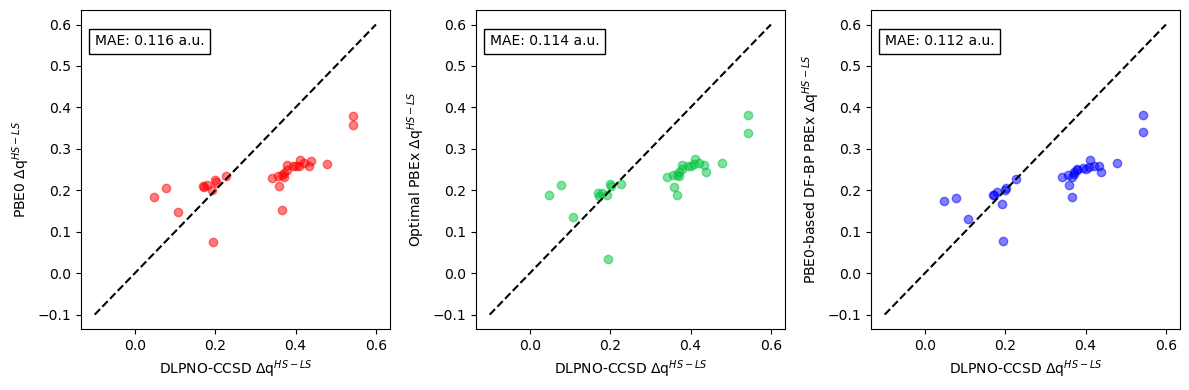

In [5]:
fig, ax = plt.subplots(figsize=(12,4), ncols=3)

ax[0].scatter(combined_df['dlpno'], combined_df['pbe0'], color='#FF0000', alpha=0.5)
ax[0].plot([-0.1, 0.6], [-0.1, 0.6], 'k--')
ax[0].set_xlabel(r'DLPNO-CCSD $\Delta$q$^{HS-LS}$')
ax[0].set_ylabel(r'PBE0 $\Delta$q$^{HS-LS}$')
ax[0].text(-0.1, 0.55, f'MAE: {np.mean(np.abs(combined_df["dlpno"] - combined_df["pbe0"])):1.3f} a.u.', bbox=dict(edgecolor='black', facecolor='white'))

ax[1].scatter(combined_df['dlpno'], combined_df['opt_hfx'], color='#00C440', alpha=0.5)
ax[1].plot([-0.1, 0.6], [-0.1, 0.6], 'k--')
ax[1].set_xlabel(r'DLPNO-CCSD $\Delta$q$^{HS-LS}$')
ax[1].set_ylabel(r'Optimal PBEx $\Delta$q$^{HS-LS}$')
ax[1].text(-0.1, 0.55, f'MAE: {np.mean(np.abs(combined_df["dlpno"] - combined_df["opt_hfx"])):1.3f} a.u.', bbox=dict(edgecolor='black', facecolor='white'))

ax[2].scatter(combined_df['dlpno'], combined_df['pred_hfx'], color='#0000FF', alpha=0.5)
ax[2].plot([-0.1, 0.6], [-0.1, 0.6], 'k--')
ax[2].set_xlabel(r'DLPNO-CCSD $\Delta$q$^{HS-LS}$')
ax[2].set_ylabel(r'PBE0-based DF-BP PBEx $\Delta$q$^{HS-LS}$')
ax[2].text(-0.1, 0.55, f'MAE: {np.mean(np.abs(combined_df["dlpno"] - combined_df["pred_hfx"])):1.3f} a.u.', bbox=dict(edgecolor='black', facecolor='white'))

fig.tight_layout()

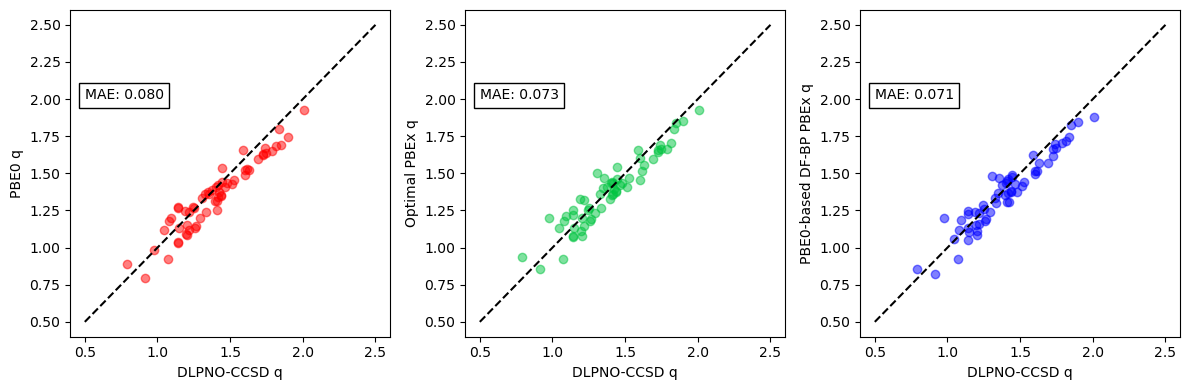

In [6]:
fig, ax = plt.subplots(figsize=(12,4), ncols=3)

ax[0].scatter(df['dlpno'], df['pbe0'], color='#FF0000', alpha=0.5)
ax[0].plot([0.5, 2.5], [0.5, 2.5], 'k--')
ax[0].set_xlabel(r'DLPNO-CCSD q')
ax[0].set_ylabel(r'PBE0 q')
ax[0].text(0.5, 2, f'MAE: {np.mean(np.abs(df["dlpno"] - df["pbe0"])):1.3f}', bbox=dict(edgecolor='black', facecolor='white'))

ax[1].scatter(df['dlpno'], df['opt_hfx'], color='#00C440', alpha=0.5)
ax[1].plot([0.5, 2.5], [0.5, 2.5], 'k--')
ax[1].set_xlabel(r'DLPNO-CCSD q')
ax[1].set_ylabel(r'Optimal PBEx q')
ax[1].text(0.5, 2, f'MAE: {np.mean(np.abs(df["dlpno"] - df["opt_hfx"])):1.3f}', bbox=dict(edgecolor='black', facecolor='white'))

ax[2].scatter(df['dlpno'], df['pred_hfx'], color='#0000FF', alpha=0.5)
ax[2].plot([0.5, 2.5], [0.5, 2.5], 'k--')
ax[2].set_xlabel(r'DLPNO-CCSD q')
ax[2].set_ylabel(r'PBE0-based DF-BP PBEx q')
ax[2].text(0.5, 2, f'MAE: {np.mean(np.abs(df["dlpno"] - df["pred_hfx"])):1.3f}', bbox=dict(edgecolor='black', facecolor='white'))

fig.tight_layout()